In [1]:
#import libs

import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
from torch.distributions.normal import Normal
import torch.multiprocessing as mp

import gymnasium as gym

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
plt.rcParams["figure.figsize"] = (10, 5)

cuda


In [2]:
#Khởi tạo môi trường

env_name = "HumanoidStandup-v4"
# Create and wrap the environment
env = gym.make(env_name)
wrapped_env = gym.wrappers.RecordEpisodeStatistics(env, 50)  # Records episode-reward

# Observation-space of HumanoidStandup-v4 (4)
obs_space_dims = env.observation_space.shape[0]
# Action-space of HumanoidStandup-v4 (1)
action_space_dims = env.action_space.shape[0]
rewards_over_seeds = []

In [3]:
#Tạo folder kết quả

import os
def mkdir(path): 
    if not os.path.exists(path):
        os.mkdir(path)

save_path = "./save"
env_path = f'{save_path}/{env_name}'
model_path = f'{save_path}/{env_name}/model'
demo_path = f'{save_path}/{env_name}/demo'

mkdir(save_path)
mkdir(env_path)
mkdir(model_path)
mkdir(demo_path)

In [4]:
# Import necessary libraries
from stable_baselines3 import DDPG
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy

# Set the seed and other training parameters
seed_set = [1]
total_num_episodes = 100000  # Total number of episodes
evaluation_interval = 1000
learning_rate = 1e-4

# Initialize an empty list to store rewards over different seeds
rewards_over_seeds = []

for seed in seed_set:
    # Set the random seed for reproducibility
    np.random.seed(seed)
    torch.manual_seed(seed)

    # Initialize the SAC agent
    model = DDPG("MlpPolicy", env, verbose=0, seed=seed, learning_rate=learning_rate)

    rewards = []

    for episode in range(0, total_num_episodes + 1, evaluation_interval):
        if episode > 0:
            # Continue training the agent
            model.learn(total_timesteps=evaluation_interval)

        # Evaluate the agent
        mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10)
        print(f"Seed: {seed}, Episode: {episode}, Mean Reward: {mean_reward}, Std Reward: {std_reward}")
        rewards.append((episode, mean_reward))

        # Save the model
        model.save(f"{model_path}/{env_name}_ddpg_seed_{seed}_episode_{episode}")

    rewards_over_seeds.append(rewards)

# Output the rewards for different seeds
print(rewards_over_seeds)


/home/admin/miniconda3/envs/tue.cm210908/lib/python3.11/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Seed: 1, Episode: 0, Mean Reward: 32041.41468963623, Std Reward: 4542.986955708365
Seed: 1, Episode: 1000, Mean Reward: 45130.06546669007, Std Reward: 18.30790077413716
Seed: 1, Episode: 2000, Mean Reward: 47784.89778556824, Std Reward: 2736.676685010299
Seed: 1, Episode: 3000, Mean Reward: 51771.18349494934, Std Reward: 1475.4551388701636
Seed: 1, Episode: 4000, Mean Reward: 51290.135931015015, Std Reward: 1638.5638128393855
Seed: 1, Episode: 5000, Mean Reward: 50311.28050384521, Std Reward: 2330.312715949764
Seed: 1, Episode: 6000, Mean Reward: 50675.09479522705, Std Reward: 1836.1850337487792
Seed: 1, Episode: 7000, Mean Reward: 52729.80604438782, Std Reward: 152.06864920772344
Seed: 1, Episode: 8000, Mean Reward: 54381.002767181395, Std Reward: 124.33655852893746
Seed: 1, Episode: 9000, Mean Reward: 49665.03597984314, Std Reward: 2494.1023539500998
Seed: 1, Episode: 10000, Mean Reward: 97430.09587020874, Std Reward: 324.54264865460203
Seed: 1, Episode: 11000, Mean Reward: 97648.758

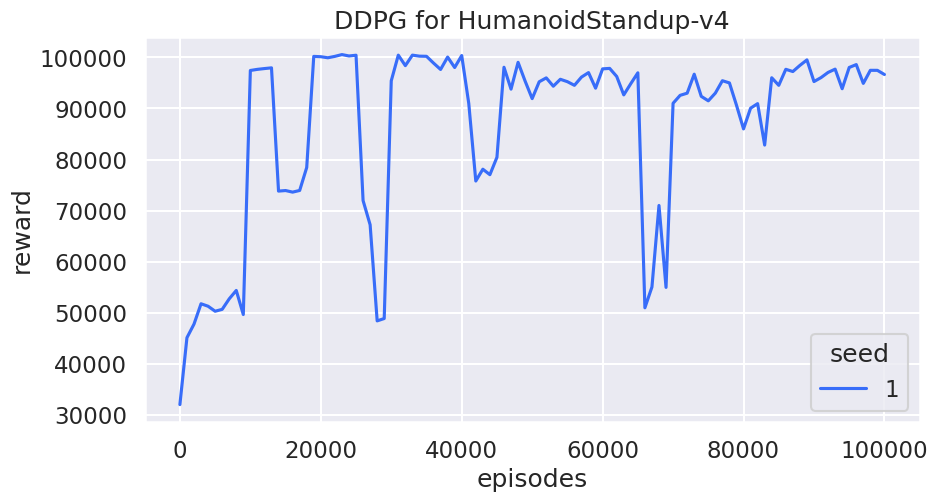

In [5]:
# ploting
rewards_to_plot = []
for seed_index, seed_rewards in enumerate(rewards_over_seeds):
    for episode, reward in seed_rewards:
        rewards_to_plot.append([seed_set[seed_index], episode, reward])
 
df1 = pd.DataFrame(rewards_to_plot, columns=["seed", "episodes", "reward"])
 
# Visualize the rewards
sns.set(style="darkgrid", context="talk", palette="rainbow")
sns.lineplot(x="episodes", y="reward", hue="seed", data=df1).set(
    title="DDPG for HumanoidStandup-v4"
)
plt.show()